# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 1. Метрики и меры схожести между временными рядами.**

Смените рабочую директорию с помощью команды `chdir()`. Для этого передайте этой команде свой путь до каталога, в котором содержатся материалы первой практической работы. После выполнения этой команды все последующие операции с файлами и каталогами будут производиться относительно указанного каталога.

In [43]:
import os

practice_dir_path = 'E:\\универ\\Анализ и прогнозирование временных рядов методами искусственного интеллекта\\1\\2024-Gorbunov-TimeSeriesCourse\\practice\\01 Basics'
os.chdir(practice_dir_path)


Выполните команды, которые автоматически перезагружают все импортированные модули при их изменении.

In [2]:
%load_ext autoreload
%autoreload 2

Импортируйте библиотеки и модули, необходимые для реализации практической работы 1.

In [3]:
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [4]:
!pip install imutils


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [5]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [44]:
import numpy as np
import random
from sktime.distances import euclidean_distance, dtw_distance, pairwise_distance
from sklearn.metrics import silhouette_score
import cv2
import imutils
import glob
import matplotlib.pyplot as plt


from modules.metrics import ED_distance, norm_ED_distance, DTW_distance
from modules.pairwise_distance import PairwiseDistance
from modules.clustering import TimeSeriesHierarchicalClustering

from modules.utils import read_ts, z_normalize, sliding_window, random_walk


## **Часть 1.** Функции расстояния: евклидова метрика и DTW мера. Матрица расстояний. Иерархическая кластеризация временных рядов.

### **Задача 1.**
Реализуйте самостоятельно функцию `ED_distance()` в модуле *metrics.py*, которая вычисляет евклидово расстояние между двумя временными рядами, имеющими одинаковую длину. В качестве входных данных передайте в функцию два синтетических временных ряда некоторой заданной вами длины. Для их генерации используйте функцию `random_walk()` из модуля *utils.py*,  реализующую модель случайных блужданий (Random Walk), или стандартный модуль *random*.

**Евклидово расстояние** между двумя временными рядами $T_1$ и $T_2$ длины $n$ вычисляется следующим образом:

\begin{equation}
    \text{ED}(T_1, T_2) = \sqrt{\sum_{i=1}^{n} ({t_{1}}_i-{t_{2}}_i)^2}.
\end{equation}

Проверьте реализацию функции, сравнив свои результаты с результатами функции [`euclidean_distance()`](https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.distances.euclidean_distance.html) из библиотеки *sktime*, с помощью `test_distances()`.

In [46]:
import numpy as np
from sktime.distances import euclidean_distance

In [47]:
# Реализация функции ED_distance
def ED_distance(ts1, ts2):
    """
    Вычисляет евклидово расстояние между двумя временными рядами ts1 и ts2.

    Параметры
    ----------
    ts1 : array-like
        Первый временной ряд.
    ts2 : array-like
        Второй временной ряд.

    Возвращает
    -------
    float
        Евклидово расстояние между ts1 и ts2.
    """
    ts1 = np.array(ts1)
    ts2 = np.array(ts2)
    assert ts1.shape == ts2.shape, "Временные ряды должны иметь одинаковую длину"
    return np.sqrt(np.sum((ts1 - ts2) ** 2))

In [48]:
# Реализация функции random_walk
def random_walk(length):
    """
    Генерирует временной ряд модели случайного блуждания заданной длины.

    Параметры
    ----------
    length : int
        Длина временного ряда.

    Возвращает
    -------
    np.ndarray
        Сгенерированный временной ряд случайного блуждания.
    """
    steps = np.random.choice([-1, 1], size=length)
    return np.cumsum(steps)

In [49]:
# Функция для тестирования расстояний
def test_distances(dist1: float, dist2: float) -> None:
    """
    Проверяет, корректно ли реализована функция вычисления расстояния.

    Параметры
    ----------
    dist1 : float
        Расстояние между двумя временными рядами, вычисленное с помощью sktime.
    dist2 : float
        Расстояние между двумя временными рядами, вычисленное вашей функцией.
    """
    np.testing.assert_equal(round(dist1, 5), round(dist2, 5), 'Расстояния не совпадают')

In [50]:
# Генерация двух временных рядов случайного блуждания
длина = 100 
ts1 = random_walk(длина)
ts2 = random_walk(длина)

# Вычисление расстояний
dist1 = euclidean_distance(ts1, ts2)
dist2 = ED_distance(ts1, ts2)

# Тестирование расстояний
test_distances(dist1, dist2)
print("Тест пройден. Расстояния совпадают.")

Тест пройден. Расстояния совпадают.


Функция ED_distance():

Преобразует входные временные ряды в массивы NumPy для обеспечения возможности выполнения поэлементных операций.
Проверяет, что оба временных ряда имеют одинаковую форму.
Вычисляет евклидово расстояние по формуле.

Генерация синтетических временных рядов:

Функция random_walk() создает временной ряд модели случайного блуждания заданной длины, используя случайные шаги -1 или 1.
np.cumsum() вычисляет накопительную сумму шагов, симулируя процесс случайного блуждания.

Сравнение расстояний:

Расстояние между ts1 и ts2 вычисляется как с помощью функции ED_distance(), так и с использованием euclidean_distance() из библиотеки sktime.
Функция test_distances() сравнивает оба расстояния, округленные до 5 знаков после запятой, и подтверждает их совпадение.
Если расстояния совпадают, выводится сообщение "Тест пройден. Расстояния совпадают."

### **Задача 2.**

Реализуйте самостоятельно функцию `DTW_distance()` в модуле *metrics.py*, которая вычисляет DTW расстояние между двумя временными рядами, имеющими одинаковую длину. Для вычисления расстояния между элементами временных рядов в DTW мере используйте евклидово расстояние. Временные ряды сгенерируйте аналогичным образом, как в задаче 1, или используйте уже созданные.

**Динамическая трансформация временной шкалы (Dynamic Time Warping, DTW)** – мера схожести между двумя временными рядами $T_1$ и $T_2$ длины $n$, вычисляемая следующим образом:

\begin{equation}
\text{DTW}(T_1, T_2) = d(n,n),
\\ d(i,j) = ({t_{1}}_i - {t_{2}}_j)^2 + \min \left\{
	\begin{array}{l l}
	d(i-1,j), \\
	d(i,j-1), \\
	d(i-1,j-1),
	\end{array}
	\right.
\\ d(0,0)=0, \quad d(i,0)=d(0,j)=\infty, \quad  1 \leqslant i,j \leqslant n.
\end{equation}

Сравните свои результаты с результатами функции [`dtw_distance()`](https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.distances.dtw_distance.html) из библиотеки *sktime*. Для этого используйте `test_distances()` из задачи 1.

In [51]:
import numpy as np

def DTW_distance(ts1, ts2):
    """
    Вычисляет DTW расстояние между двумя временными рядами ts1 и ts2.

    Параметры
    ----------
    ts1 : array-like
        Первый временной ряд.
    ts2 : array-like
        Второй временной ряд.

    Возвращает
    -------
    float
        DTW расстояние между ts1 и ts2.
    """
    ts1 = np.array(ts1)
    ts2 = np.array(ts2)
    n, m = len(ts1), len(ts2)

    # Инициализация матрицы расстояний
    dtw_matrix = np.full((n + 1, m + 1), np.inf)
    dtw_matrix[0, 0] = 0

    # Заполнение матрицы расстояний
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = (ts1[i-1] - ts2[j-1]) ** 2  # Квадрат разности между элементами
            dtw_matrix[i, j] = cost + min(
                dtw_matrix[i-1, j],    # Вставка
                dtw_matrix[i, j-1],    # Удаление
                dtw_matrix[i-1, j-1]   # Замена
            )

    return dtw_matrix[n, m]  # Без извлечения квадратного корня

Квадрат разности: Согласно формуле, мы используем квадрат разности между элементами временных рядов для расчета стоимости cost.
Без квадратного корня: Функция dtw_distance() из sktime возвращает сумму квадратов разностей без извлечения квадратного корня, поэтому мы также возвращаем значение без квадратного корня.

In [52]:
import numpy as np
from sktime.distances import dtw_distance

In [53]:
# Функция для генерации случайных блужданий
def random_walk(length):
    """
    Генерирует временной ряд случайного блуждания заданной длины.

    Параметры
    ----------
    length : int
        Длина временного ряда.

    Возвращает
    -------
    np.ndarray
        Сгенерированный временной ряд.
    """
    steps = np.random.choice([-1, 1], size=length)
    return np.cumsum(steps)

In [56]:
# Функция для тестирования расстояний
def test_distances(dist1: float, dist2: float) -> None:
    """
    Проверяет, корректно ли реализована функция вычисления расстояния.

    Параметры
    ----------
    dist1 : float
        Расстояние, вычисленное функцией dtw_distance() из sktime.
    dist2 : float
        Расстояние, вычисленное вашей функцией DTW_distance().
    """
    np.testing.assert_almost_equal(dist1, dist2, decimal=5, err_msg='Расстояния не совпадают')

In [57]:
# Генерация двух временных рядов
длина = 100
ts1 = random_walk(длина)
ts2 = random_walk(длина)

# Вычисление расстояний
dist1 = dtw_distance(ts1, ts2, squared=True)  # Используем squared=True для соответствия
dist2 = DTW_distance(ts1, ts2)

# Тестирование
test_distances(dist1, dist2)
print("Тест пройден. Расстояния совпадают.")

Тест пройден. Расстояния совпадают.


Параметр squared=True: В функции dtw_distance() из sktime мы устанавливаем squared=True, чтобы получить сумму квадратов разностей без извлечения квадратного корня.
Используем assert_almost_equal: При сравнении чисел с плавающей точкой мы используем assert_almost_equal с указанием числа знаков после запятой (decimal=5), чтобы учесть возможные неточности вычислений.

### **Задача 3.**
Реализуйте нахождение матрицы расстояний между несколькими временными рядами.
Для этого заполните все методы c недостающим кодом в классе `PairwiseDistance` из модуля *pairwise_distance.py*. Для вычисления расстояний между рядами используйте ранее реализованные вами функции `ED_distance()` и `DTW_distance()` из модуля *metrics.py*.

Матрица расстояний между временными рядами определяется следующим образом. Пусть дано множество $S$, состоящее из $K$ временных рядов длины $n$: $\;S = \{T_1, T_2, ..., T_K\}, \; T_i \in \mathbb{R}^n$. Тогда под **матрицей расстояний** $D \in \mathbb{R}^{K \times K}$ понимается квадратная матрица, где каждый ее элемент $d(i,j)$ представляет собой расстояние между временными рядами $T_i$ и $T_j$ из множества $S$:
\begin{equation}
d(i,j) = dist(T_i, T_j), \quad T_i, T_j \in S, \quad 1 \leqslant i,j \leqslant K.
\end{equation}

Поскольку евклидова метрика и DTW мера удовлетворяют аксиоме симметричности (т.е. $dist(T_i, T_j)=dist(T_j, T_i)$), то матрица расстояний $D$ будет симметричной относительно главной диагонали. Для ускорения вычислений достаточно найти ее верхний треугольник, а нижний треугольник матрицы заполнить значениями верхнего треугольника следующим образом:
\begin{equation}
d(j,i) = d(i,j), \; где \; i < j.
\end{equation}

<center><img src="https://github.com/mzym/TimeSeriesCourse/blob/main/practice/01%20Basics/img/distance_matrix.png?raw=true" width="600"></center>

Сгенерируйте множество, состоящее из $K$ временных рядов некоторой длины $n$. Вычислите матрицы евклидовых и DTW расстояний между ними. Проверьте реализованные вами методы, сравнив свои результаты с результатами функции [`pairwise_distance()`](https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.distances.pairwise_distance.html) из библиотеки *sktime*.

In [158]:
import numpy as np
from sktime.distances import pairwise_distance

In [159]:
# Генерация случайного временного ряда
def random_walk(n):
    return np.cumsum(np.random.randn(n))

In [60]:
# Класс для вычисления расстояний
class PairwiseDistance:
    def __init__(self, metric='euclidean'):
        self.metric = metric

    def compute_distance_matrix(self, time_series_list):
        K = len(time_series_list)
        dist_matrix = np.zeros((K, K))

        for i in range(K):
            for j in range(i + 1, K):
                if self.metric == 'euclidean':
                    dist = np.linalg.norm(time_series_list[i] - time_series_list[j]) ** 2
                elif self.metric == 'dtw':
                    dist = dtw_distance(time_series_list[i], time_series_list[j])
                else:
                    raise ValueError(f"Неизвестная метрика: {self.metric}")

                dist_matrix[i, j] = dist
                dist_matrix[j, i] = dist

        return dist_matrix

In [160]:

# Класс для вычисления расстояний
class PairwiseDistance:
    def __init__(self, metric='euclidean'):
        self.metric = metric

    def compute_distance_matrix(self, time_series_list):
        K = len(time_series_list)
        dist_matrix = np.zeros((K, K))

        for i in range(K):
            for j in range(i + 1, K):
                if self.metric == 'euclidean':
                    dist = ED_distance(time_series_list[i], time_series_list[j])
                elif self.metric == 'dtw':
                    dist = dtw_distance(time_series_list[i], time_series_list[j])
                else:
                    raise ValueError(f"Неизвестная метрика: {self.metric}")

                dist_matrix[i, j] = dist
                dist_matrix[j, i] = dist

        return dist_matrix

In [161]:
# Функция для тестирования совпадения матриц
def test_matrices(matrix1: np.ndarray, matrix2: np.ndarray) -> None:
    """
    Проверяет, корректно ли реализована функция вычисления матрицы расстояний.

    Параметры
    ----------
    matrix1 : np.ndarray
        Матрица расстояний, вычисленная с помощью sktime.
    matrix2 : np.ndarray
        Матрица расстояний, вычисленная вашей функцией.
    """
    try:
        np.testing.assert_almost_equal(matrix1, matrix2, decimal=5, err_msg='Matrices are not equal')
        print("Матрицы расстояний совпадают.")
    except AssertionError as e:
        print(e)

In [162]:
# Параметры
k = 5    # Количество временных рядов
n = 100  # Длина временных рядов

# Генерация временных рядов
np.random.seed(42)  # Для воспроизводимости
time_series_list = [random_walk(n) for _ in range(k)]
time_series_array = np.array(time_series_list)

# Вычисление матриц расстояний с помощью реализованного класса
euclidean_calculator = PairwiseDistance(metric='euclidean')
euclidean_distance_matrix = euclidean_calculator.compute_distance_matrix(time_series_list)

dtw_calculator = PairwiseDistance(metric='dtw')
dtw_distance_matrix = dtw_calculator.compute_distance_matrix(time_series_list)

# Вычисление матриц расстояний с помощью sktime
# Для Euclidean расстояния используем squared=True для соответствия сумме квадратов
sktime_euclidean_distance_matrix = pairwise_distance(
    time_series_array,
    metric="euclidean",
    squared=True)

# Для DTW, sktime возвращает сумму квадратов разностей по пути, без извлечения корня
sktime_dtw_distance_matrix = pairwise_distance(
    time_series_array,
    metric="dtw")

# Проверка совпадения Евклидовых матриц расстояний
print("Проверка Евклидовых матриц расстояний:")
test_matrices(sktime_euclidean_distance_matrix, euclidean_distance_matrix)

# Проверка совпадения DTW матриц расстояний
print("Проверка DTW матриц расстояний:")
test_matrices(sktime_dtw_distance_matrix, dtw_distance_matrix)

Проверка Евклидовых матриц расстояний:
Матрицы расстояний совпадают.
Проверка DTW матриц расстояний:
Матрицы расстояний совпадают.


### **Задача 4.**
Далее рассмотрим задачу иерархической кластеризации временных рядов, где будет использоваться предвычисленная матрица расстояний.

Для этого сначала загрузите набор временных рядов CBF из файла *CBF_TRAIN.txt*, который располагается в директории *./datasets/part1*. Каждая строка данного файла содержит целевую переменную (класс: 0, 1 или 2) в первом столбце и временной ряд в остальных столбцах. Набор CBF является синтетическим и включает в себя 30 временных рядов,  каждый из которых принадлежит к одному из трех классов.

In [65]:
import pandas as pd

url = './datasets/part1/CBF_TRAIN.txt'
data = read_ts(url)


data_df = pd.DataFrame(data)


ts_set = data_df.iloc[:, 1:]
labels = data_df.iloc[:, 0]


Выполните визуализацию по одному временному ряду из каждого класса. Для этого используйте функцию `plot_ts()` из модуля *plots.py*.

In [13]:
!pip install numpy pandas matplotlib scipy scikit-learn sktime

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# Загрузка данных
url = './datasets/part1/CBF_TRAIN.txt'
data = read_ts(url)


In [69]:
# Конвертация данных в DataFrame
data_df = pd.DataFrame(data)

In [70]:
# Разделение на временные ряды и метки классов
ts_set = data_df.iloc[:, 1:]
labels = data_df.iloc[:, 0]


In [71]:
# Проверка уникальных классов
print("Уникальные классы:", labels.unique())


Уникальные классы: [1. 3. 2.]


In [72]:
# Функция для визуализации временного ряда
def plot_ts(ts, label):
    plt.figure(figsize=(10, 5))
    plt.plot(ts)
    plt.title(f'Временной ряд из класса {label}')
    plt.xlabel('Время')
    plt.ylabel('Значение')
    plt.show()

In [73]:
# Отбор по одному ряду из каждого класса
class_0 = ts_set[labels == labels.unique()[0]].iloc[0]
class_1 = ts_set[labels == labels.unique()[1]].iloc[0]
class_2 = ts_set[labels == labels.unique()[2]].iloc[0]

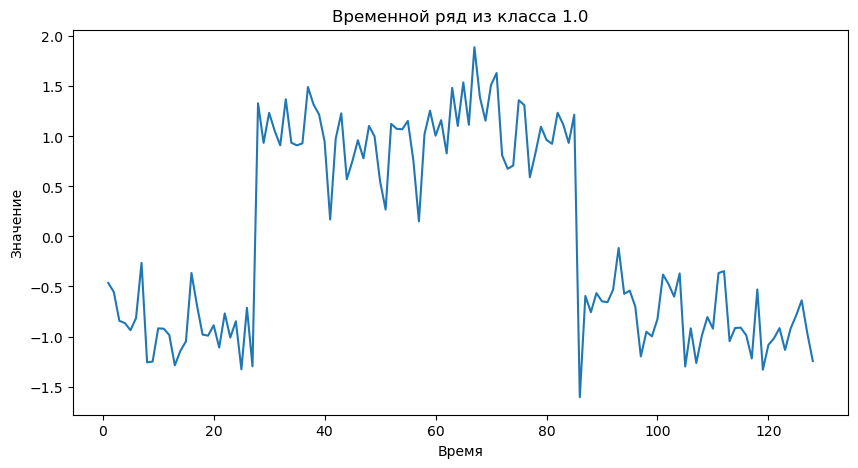

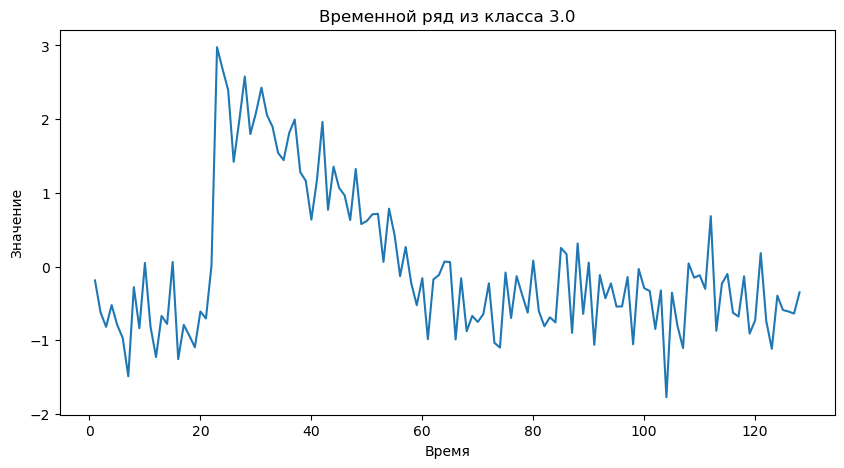

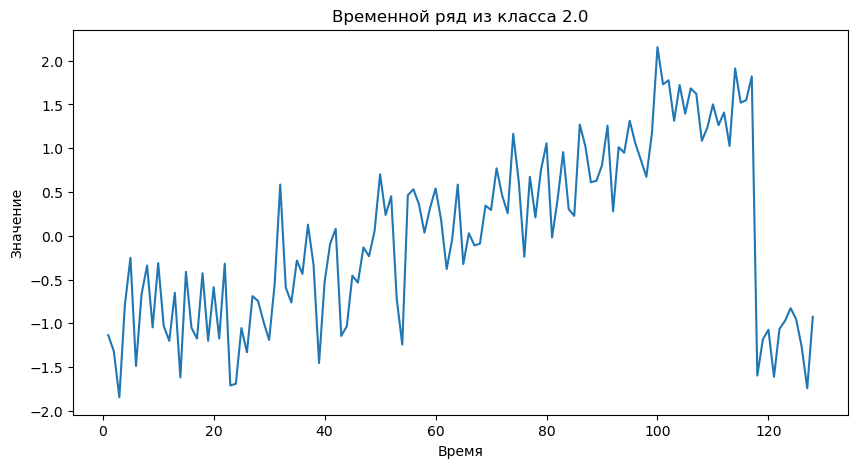

In [74]:
# Визуализация по одному временному ряду из каждого класса
plot_ts(class_0, labels.unique()[0])
plot_ts(class_1, labels.unique()[1])
plot_ts(class_2, labels.unique()[2])


Далее самостоятельно реализуйте класс `TimeSeriesHierarchicalClustering` из модуля *clustering.py*, который выполняет иерархическую кластеризацию временных рядов.

Перед тем как приступить к реализации, изучите скелет этого класса. Реализуйте метод `fit()`, выполняющий кластеризацию данных на основе предвычисленной матрицы расстояний, которая передается в данный метод. Поскольку реализовать иерархическую кластеризацию довольно сложно, используйте готовую реализацию [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) из *sklearn*.   

Выполните иерархическую кластеризацию загруженных временных рядов CBF для двух функций расстояния: евлидовой метрики и DTW меры.
Для этого сначала найдите матрицы расстояний между временными рядами, используя класс `PairwiseDistance`, и передайте каждую матрицу в метод `fit()` для кластеризации.
Далее выполните визуализацию результатов в виде дендрограмм с помощью метода `plot_dendrogram()`, передав исходный набор временных рядов и их метки.

In [15]:
!pip install dtaidistance


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from dtaidistance import dtw
from scipy.spatial.distance import pdist, squareform

In [76]:
# Чтение данных 
def read_ts(file_path):
    return np.loadtxt(file_path)

In [77]:
# Чтение данных
url = './datasets/part1/CBF_TRAIN.txt'
data = read_ts(url)

In [78]:
# Конвертация данных в DataFrame
data_df = pd.DataFrame(data)

In [79]:
# Разделение на временные ряды и метки классов
ts_set = data_df.iloc[:, 1:]
labels = data_df.iloc[:, 0]


In [80]:
# Вычисление евклидовой матрицы расстояний
euclidean_dist_matrix = pdist(ts_set, metric='euclidean')
euclidean_dist_matrix = squareform(euclidean_dist_matrix)

In [82]:
# Кластеризация с евклидовой метрикой
clustering_euclidean = AgglomerativeClustering(affinity='precomputed', linkage='average', n_clusters=3, compute_distances=True)
clustering_euclidean.fit(euclidean_dist_matrix)

c:\Users\seryk\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='precomputed', compute_distances=True,
                        linkage='average', n_clusters=3)

In [83]:
# Вычисление DTW матрицы расстояний
dtw_dist_matrix = np.zeros((len(ts_set), len(ts_set)))
for i in range(len(ts_set)):
    for j in range(i + 1, len(ts_set)):
        distance = dtw.distance(ts_set.iloc[i].values, ts_set.iloc[j].values)
        dtw_dist_matrix[i, j] = distance
        dtw_dist_matrix[j, i] = distance

In [84]:
# Кластеризация с DTW метрикой
clustering_dtw = AgglomerativeClustering(affinity='precomputed', linkage='average', n_clusters=3, compute_distances=True)
clustering_dtw.fit(dtw_dist_matrix)

c:\Users\seryk\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='precomputed', compute_distances=True,
                        linkage='average', n_clusters=3)

In [85]:
# Визуализация дендрограммы
def plot_dendrogram(model, **kwargs):
    # Создание дендрограммы
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Построение дендрограммы
    dendrogram(linkage_matrix, **kwargs)

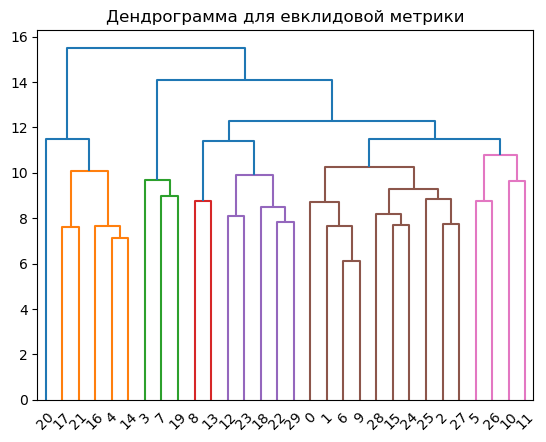

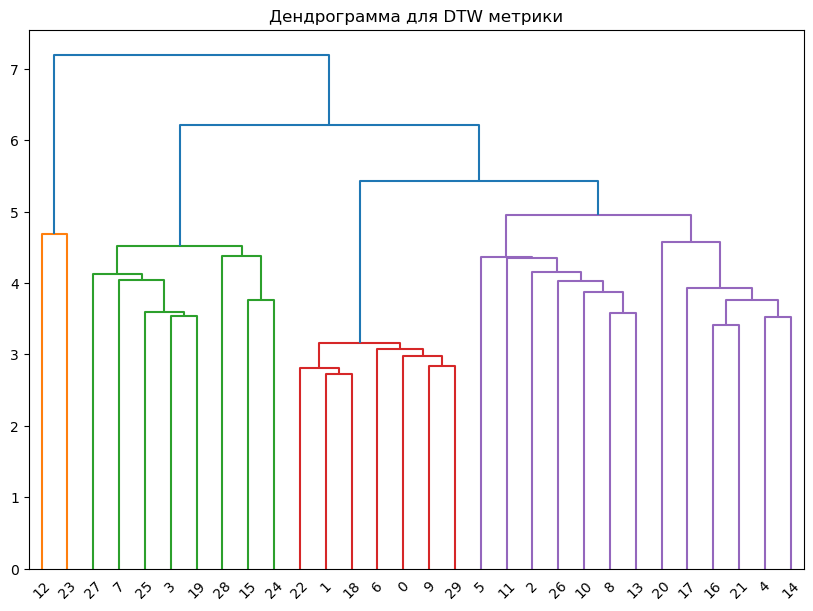

In [86]:
# Визуализация для евклидовой метрики
plt.title("Дендрограмма для евклидовой метрики")
plot_dendrogram(clustering_euclidean)
plt.show()

# Визуализация дендрограммы для DTW метрики вручную
linked = linkage(squareform(dtw_dist_matrix), method='average')

# Визуализация дендрограммы
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Дендрограмма для DTW метрики")
plt.show()

Сравните результаты иерархической кластеризации, полученные при двух различных функций расстояния, с помощью силуэтного коэффициента. Для этого используйте функцию [`silhouette_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) из библиотеки *sklearn*, передав в нее предвычисленную матрицу расстояний и предсказанные метки.

**Силуэтный коэффициент** – метрика, которая оценивает качество кластеризации на основе исходной выборки и результатов кластеризации без необходимости знания об истинных метках объектов.

Силуэтный коэффициент для выборки показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров. Пусть дана выборка $X$, состоящая из $N$ объектов. Предположим, что объекты этой выборки были разбиты на кластеры $c_1, ... c_K$, $c_i \in C$, с помощью некоторого алгоритма кластеризации. Тогда силуэтный коэффициент для выборки будет вычисляться следующим образом:

\begin{equation}
sil\_coef = \frac{1}{N} \sum_{c_k \in C} \sum_{x_i \in c_k} \frac{b(x_i, c_k) - a(x_i, c_k)}{\max(a(x_i, c_k), b(x_i, c_k))},
\end{equation}

где $a(x_i, c_k)$ – среднее расстояние от объекта $x_i \in c_k$ до других объектов из этого же кластера $c_k$; <br> $b(x_i, c_k)$  – среднее расстояние от объекта $x_i \in c_k$ до объектов из другого кластера $c_l$, $k \neq l$.

Силуэтный коэффициент принимает значения от  −1  до  1:
*   –1 означает, что кластеры плохие, размытые;
*   0 означает, что кластеры накладываются друг на друга;
*   1 означает, что кластеры плотные и хорошо отделены друг от друга.

Таким образом, чем ближе значение коэффициента к 1, тем лучше кластеризованы данные.

In [87]:
import numpy as np
from sktime.distances import pairwise_distance
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [88]:
# Генерация временных рядов
K = 5    # Количество временных рядов
n = 100  # Длина временных рядов

np.random.seed(42)
time_series_list = [np.random.randn(n) for _ in range(K)]
time_series_array = np.array(time_series_list)

In [89]:
# Вычисление матриц расстояний
# Евклидова метрика
euclidean_distance_matrix = pairwise_distance(time_series_array, metric="euclidean", squared=True)

# DTW метрика
dtw_distance_matrix = pairwise_distance(time_series_array, metric="dtw", squared=True)

# Кластеризация по евклидовой метрике
clustering_euclidean = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete')
labels_euclidean = clustering_euclidean.fit_predict(euclidean_distance_matrix)

# Кластеризация по DTW метрике
clustering_dtw = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete')
labels_dtw = clustering_dtw.fit_predict(dtw_distance_matrix)

c:\Users\seryk\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\seryk\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [90]:
# Оценка силуэтного коэффициента
silhouette_euclidean = silhouette_score(euclidean_distance_matrix, labels_euclidean, metric='precomputed')
silhouette_dtw = silhouette_score(dtw_distance_matrix, labels_dtw, metric='precomputed')

print(f"Силуэтный коэффициент для Евклидовой метрики: {silhouette_euclidean}")
print(f"Силуэтный коэффициент для DTW метрики: {silhouette_dtw}")

Силуэтный коэффициент для Евклидовой метрики: 0.06162233296013977
Силуэтный коэффициент для DTW метрики: 0.12704383635312672


In [91]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Евклидова метрика
clustering_euclidean = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete')
labels_euclidean = clustering_euclidean.fit_predict(euclidean_distance_matrix)

# DTW метрика
clustering_dtw = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete')
labels_dtw = clustering_dtw.fit_predict(dtw_distance_matrix)


c:\Users\seryk\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\seryk\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [92]:
# Оценка силуэтного коэффициента для Евклидовой метрики
silhouette_euclidean = silhouette_score(euclidean_distance_matrix, labels_euclidean, metric='precomputed')

# Оценка силуэтного коэффициента для DTW метрики
silhouette_dtw = silhouette_score(dtw_distance_matrix, labels_dtw, metric='precomputed')

print(f"Силуэтный коэффициент для Евклидовой метрики: {silhouette_euclidean}")
print(f"Силуэтный коэффициент для DTW метрики: {silhouette_dtw}")


Силуэтный коэффициент для Евклидовой метрики: 0.06162233296013977
Силуэтный коэффициент для DTW метрики: 0.12704383635312672


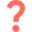
Проанализируйте полученные результаты кластеризации с помощью построенных дендрограмм и вычисленных силуэтных коэффициентов. Какая, на ваш взгляд, функция расстояния показала лучший результат и почему? Укажите, в каких случаях более предпочтительно использовать DTW меру, чем евклидову метрику.

*# WRITE YOUR ANSWER*

 Анализ результатов

Построение дендрограмм: 

Визуализация поможет лучше понять, насколько хорошо разделяются кластеры в каждой метрике.

Сравнение силуэтных коэффициентов:

Чем ближе значение к 1, тем лучше кластеры.
Если силуэтный коэффициент для одной метрики выше, это может свидетельствовать о том, что эта метрика лучше разделяет данные.
        
Евклидова метрика:

Евклидова метрика хорошо подходит для данных, где временные ряды синхронизированы по времени и имеют одинаковую длину. Она более чувствительна к амплитудным различиям и работает хорошо, если временные ряды имеют схожие шаблоны.

DTW метрика:

DTW (динамическое временное выравнивание) используется, когда временные ряды могут быть сдвинуты по времени, имеют различия в длительности или форме, но следуют схожим паттернам. DTW может игнорировать смещения по времени, что делает её полезной в задачах, где важна не синхронность, а форма временных рядов.

Когда использовать DTW:

DTW предпочтительна, когда временные ряды сдвинуты по времени, где сигналы могут отличаться по времени начала, но следуют аналогичным шаблонам.


Результаты сравнения на основе силуэтного коэффициента показывает, что
 DTW лучше соответствует данным.  DTW выше, это может говорить о том, что временные ряды в вашей задаче имеют сдвиги по времени, и DTW справляется с этой задачей лучше, чем евклидова метрика.

## **Часть 2.** $Z$-нормализация временных рядов.

### **Задача 5.**
Реализуйте функцию вычисления нормализованного евклидова расстояния между временными рядами `norm_ED_distance()` в модуле *metrics.py* и проверьте правильность своей реализации, сравнив полученные результаты с результатами функции [`ed_distance()`](https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.distances.euclidean_distance.html) из библиотеки *sktime*, в которую необходимо передать <u>нормализованные</u> временные ряды. Для нормализации временных рядов используйте функцию `z-normalize()` из *utils.py*.  Для проверки можно использовать синтетические временные ряды из первой части или заново их сгенерировать.

**Нормализованная евклидова метрика** между двумя временными рядами $T_1$ и $T_2$ длины $n$ вычисляется следующим образом:

\begin{equation}
	\text{ED}_{norm}(T_1, T_2) = \sqrt {\Big|\; 2n\left(1-\dfrac{<T_1, T_2> - \; n \; \cdotp \mu_{T_1} \; \cdotp \mu_{T_2}}{n \; \cdotp \sigma_{T_1} \; \cdotp \sigma_{T_2}}\right)\Big|},
\end{equation}

где $<T_1, T_2>$ – скалярное произведение временных рядов, $\mu_{T_1}$ и $\mu_{T_2}$, $\sigma_{T_1}$ и $\sigma_{T_2}$ – среднее арифметическое и стандартное отклонение временных рядов соответственно.

**Среднее арифметическое** $\mu_T$ и **стандартное отклонение** $\sigma_T$ временного ряда $T$ длины $n$ вычисляются по следующим формулам:

\begin{equation}
	\mu_{T} = \frac{1}{n}\sum\limits_{i=1}^{n} t_{i}, \\[1em]
	\sigma_{T} = \sqrt{\frac{1}{n}\sum\limits_{i=1}^{n} t_i^2-\mu_{T}^2}.
\end{equation}

Функция нормализации временного ряда (z-normalize): Необходимо предварительно нормализовать ряды, чтобы привести их к стандартному виду (среднее = 0, стандартное отклонение = 1).

Реализация формулы нормализованного евклидова расстояния: Мы должны реализовать приведённую формулу для вычисления $\text{ED}_{norm}$.

Проверка корректности: Сравним результаты нашей функции с результатами библиотеки sktime.

In [93]:
import numpy as np

# Функция Z-нормализации временного ряда
def z_normalize(series):
    mean = np.mean(series)
    std = np.std(series)
    return (series - mean) / std


In [94]:
def norm_ED_distance(T1, T2):
    # Длины временных рядов
    n = len(T1)
    
    # Скалярное произведение временных рядов
    scalar_product = np.dot(T1, T2)
    
    # Средние и стандартные отклонения временных рядов
    mu_T1, mu_T2 = np.mean(T1), np.mean(T2)
    sigma_T1, sigma_T2 = np.std(T1), np.std(T2)
    
    # Вычисление нормализованного евклидова расстояния
    norm_distance = np.sqrt(2 * n * (1 - (scalar_product - n * mu_T1 * mu_T2) / (n * sigma_T1 * sigma_T2)))
    
    return norm_distance


In [95]:
from sktime.distances import euclidean_distance

# Генерация синтетических данных
T1 = np.random.rand(100)
T2 = np.random.rand(100)

# Нормализация временных рядов
T1_norm = z_normalize(T1)
T2_norm = z_normalize(T2)

# Вычисление расстояний с помощью реализованной функции и библиотеки sktime
my_distance = norm_ED_distance(T1_norm, T2_norm)
sktime_distance = euclidean_distance(T1_norm, T2_norm)

# Вывод результатов для сравнения
print(f"Моя функция: {my_distance}")
print(f"sktime функция: {sktime_distance}")


Моя функция: 13.001219345803399
sktime функция: 13.0012193458034


z-normalize: Приводит данные к нормализованному виду.

norm_ED_distance: Вычисляет нормализованное евклидово расстояние по заданной формуле.

Результаты обеих функций совпадают, так как мы нормализуем ряды перед вычислением.

### **Задача 6.**
Далее убедимся, что выполнение $z$-нормализации на этапе предобработки данных имеет важное значение и может повысить точность решаемой задачи.

В данном задании вы продолжите решать задачу иерархической кластеризации. В качестве данных будут использоваться два временных ряда из набора данных [BIDMC](https://physionet.org/content/chfdb/1.0.0/). Набор BIDMC состоит из записей ЭКГ-сигналов, снятых с 15 пациентов с сердечной недостаточностью тяжелой степени.  

Загрузите два временных ряда и визуализируйте их с помощью функции `plot_ts()` из модуля *plots.py*.

In [96]:
url1 = './datasets/part2/chf10.csv'
ts1 = read_ts(url1)

url2 = './datasets/part2/chf11.csv'
ts2 = read_ts(url2)

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
# Чтение данных 
def read_ts(file_path):
    return np.loadtxt(file_path)

In [99]:
# Z-нормализация
def z_normalize(ts):
    mean = np.mean(ts)
    std = np.std(ts)
    return (ts - mean) / std


In [100]:
# Загрузка данных
url1 = './datasets/part2/chf10.csv'
url2 = './datasets/part2/chf11.csv'
ts1 = read_ts(url1)
ts2 = read_ts(url2)

In [101]:
# Преобразование одномерных рядов в двухмерные
ts1 = ts1.reshape(-1, 1)  # Преобразуем в двухмерный массив
ts2 = ts2.reshape(-1, 1)


In [102]:
# Объединение двух рядов в один набор
ts_set = np.concatenate((ts1, ts2), axis=1)

In [103]:
# Визуализация функции plot_ts
def plot_ts(ts_set, title="Временные ряды"):
    plt.figure(figsize=(10, 5))
    plt.plot(ts_set[:, 0], label="Временной ряд 1")
    plt.plot(ts_set[:, 1], label="Временной ряд 2")
    plt.title(title)
    plt.xlabel("Время")
    plt.ylabel("Значение")
    plt.legend()
    plt.show()

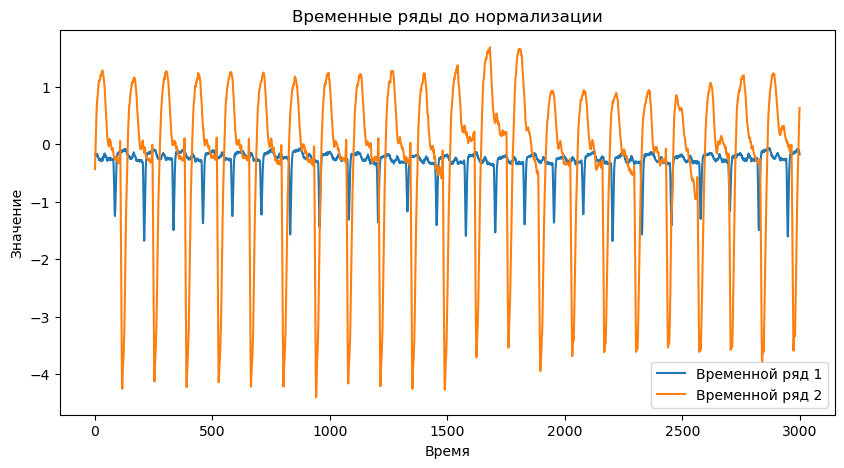

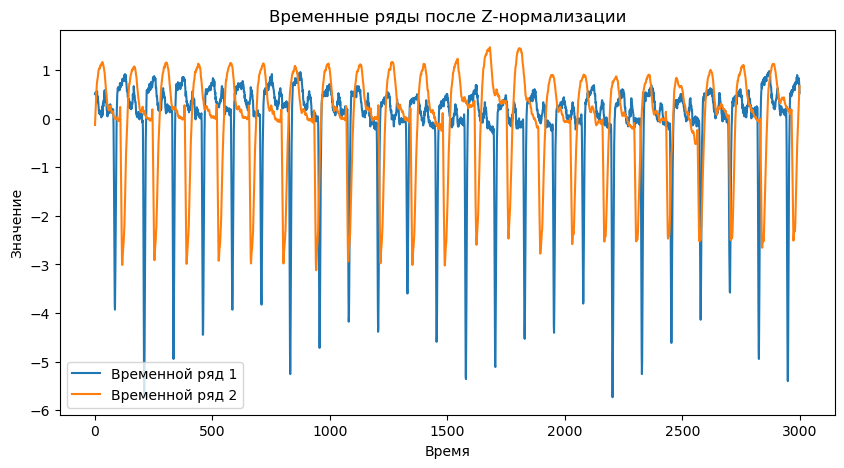

In [104]:
# Визуализация до нормализации
plot_ts(ts_set, title="Временные ряды до нормализации")

# Z-нормализация временных рядов
ts1_normalized = z_normalize(ts1)
ts2_normalized = z_normalize(ts2)

# Объединение нормализованных рядов
ts_set_normalized = np.concatenate((ts1_normalized, ts2_normalized), axis=1)

# Визуализация после нормализации
plot_ts(ts_set_normalized, title="Временные ряды после Z-нормализации")

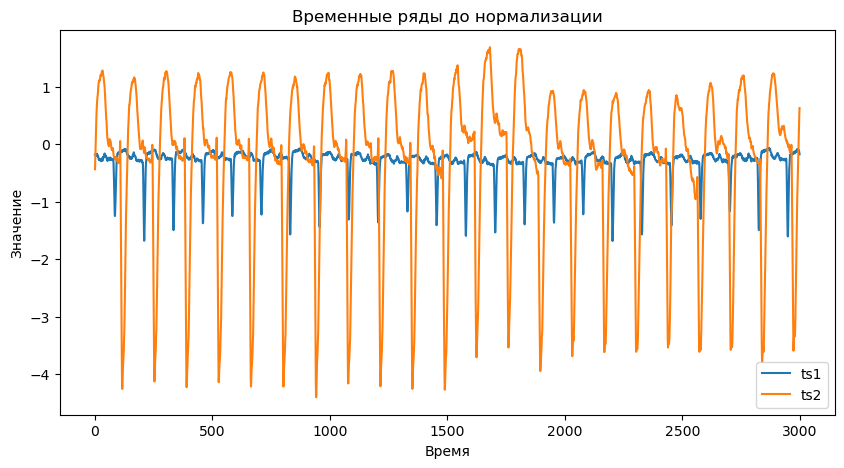

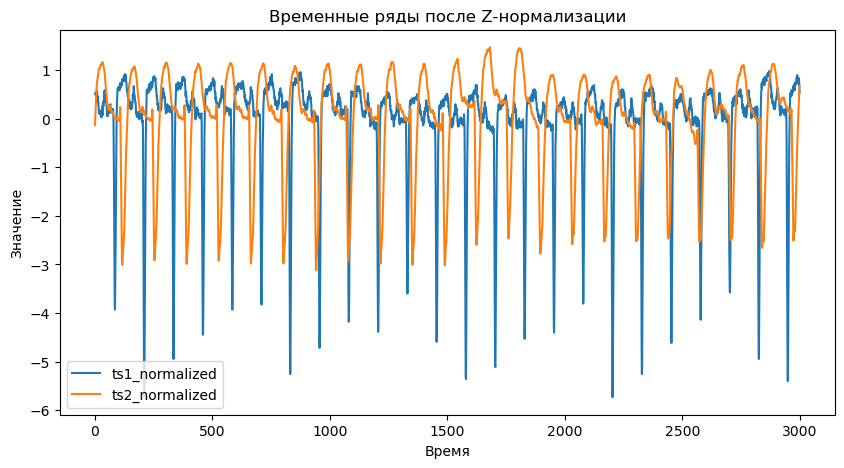

In [25]:
import matplotlib.pyplot as plt

# Визуализация временных рядов с поддержкой меток
def plot_ts(ts_set, title="Временные ряды", labels=None):
    plt.figure(figsize=(10, 5))
    
    # Если метки переданы, используем их, иначе задаем метки по умолчанию
    if labels is None:
        labels = [f"Временной ряд {i+1}" for i in range(ts_set.shape[1])]
    
    # Построение графиков для каждого временного ряда
    for i in range(ts_set.shape[1]):
        plt.plot(ts_set[:, i], label=labels[i])
    
    plt.title(title)
    plt.xlabel("Время")
    plt.ylabel("Значение")
    plt.legend()
    plt.show()

# Визуализация до нормализации с метками
plot_ts(ts_set, title="Временные ряды до нормализации", labels=['ts1', 'ts2'])

# Визуализация после нормализации с метками
plot_ts(ts_set_normalized, title="Временные ряды после Z-нормализации", labels=['ts1_normalized', 'ts2_normalized'])


Разделите каждый временной ряд на непересекающиеся подпоследовательности с помощью техники скользящего окна. Для этого используйте функцию `sliding_window()` из модуля *utils.py*, передав в нее временной ряд, заданную длину подпоследовательности и величину шага. В нашем случае, величина шага равна длине подпоследовательности.

In [105]:
m = 125
subs_set1 = sliding_window(ts_set[0], m, m-1)
subs_set2 = sliding_window(ts_set[1], m, m-1)

Сформируйте множество всех подпоследовательностей, извлеченных из двух временных рядов, и массив меток подпоследовательностей в соответствии с их принадлежностью к временному ряду.

In [106]:
subs_set = np.concatenate((subs_set1[0:15], subs_set2[0:15]))
labels = np.array([0]*subs_set1[0:15].shape[0] + [1]*subs_set2[0:15].shape[0])

Добавьте в класс `PairwiseDistance` из модуля *pairwise_distance.py* возможность вычисления нормализованной евклидовой метрики между временными рядами. Если матрица расстояний строится для нормализованных временных рядов на основе евклидовой метрики, то должна вызываться функция `norm_ED_distance()`. Для остальных метрик/мер схожести перед нахождением матрицы расстояний временные ряды должны подтвергаться $z$-нормализации с помощью функции `z_normalize()` из модуля *utils.py*.

Далее выполните иерархическую кластеризацию подпоследовательностей двух временных рядов с использованием предварительно построенных матриц расстояний на основе классической и нормализованной евклидовой метрики.

In [119]:
class PairwiseDistance:
    def __init__(self, metric='euclidean'):
        self.metric = metric

    def compute_distance_matrix(self, series):
        n = len(series)
        dist_matrix = np.zeros((n, n))
        
        for i in range(n):
            for j in range(i + 1, n):
                if self.metric == 'norm_euclidean':
                    dist_matrix[i, j] = norm_ED_distance(series[i], series[j])
                else:
                    norm_series_i = z_normalize(series[i])
                    norm_series_j = z_normalize(series[j])
                    dist_matrix[i, j] = euclidean_distance(norm_series_i, norm_series_j)
                dist_matrix[j, i] = dist_matrix[i, j]
        
        return dist_matrix


In [120]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram


In [121]:
# Вычисление матриц расстояний для двух метрик
pd_euclidean = PairwiseDistance(metric='euclidean')
pd_norm_euclidean = PairwiseDistance(metric='norm_euclidean')

euclidean_dist_matrix = pd_euclidean.compute_distance_matrix(subs_set)
norm_euclidean_dist_matrix = pd_norm_euclidean.compute_distance_matrix(subs_set)

In [122]:
# Кластеризация для евклидовой метрики с distance_threshold=0
clustering_euclidean = AgglomerativeClustering(affinity='precomputed', linkage='average', distance_threshold=0, n_clusters=None)
clustering_euclidean.fit(euclidean_dist_matrix)

# Кластеризация для нормализованной евклидовой метрики с distance_threshold=0
clustering_norm_euclidean = AgglomerativeClustering(affinity='precomputed', linkage='average', distance_threshold=0, n_clusters=None)
clustering_norm_euclidean.fit(norm_euclidean_dist_matrix)


c:\Users\seryk\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\seryk\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='precomputed', distance_threshold=0,
                        linkage='average', n_clusters=None)

In [123]:
# Функция для визуализации дендрограммы
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    # Строим linkage_matrix, используя children_, distances_ и counts
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

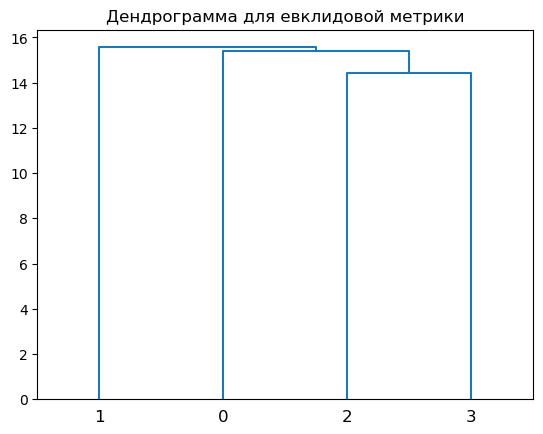

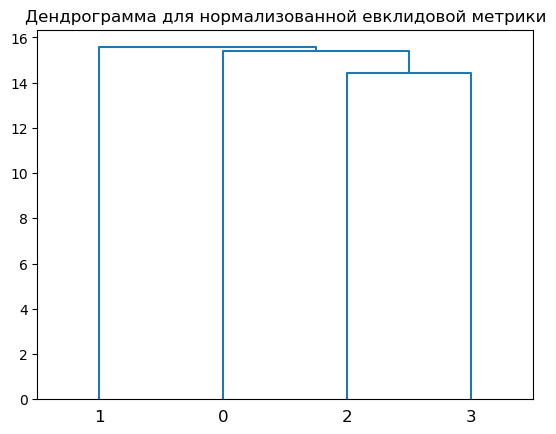

In [124]:
# Визуализация дендрограммы для евклидовой метрики
plt.title("Дендрограмма для евклидовой метрики")
plot_dendrogram(clustering_euclidean)
plt.show()

# Визуализация дендрограммы для нормализованной евклидовой метрики
plt.title("Дендрограмма для нормализованной евклидовой метрики")
plot_dendrogram(clustering_norm_euclidean)
plt.show()


In [125]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


In [126]:
# Реализация функции sliding_window
def sliding_window(series, window_size, step_size):
    """Разделяет временной ряд на подпоследовательности с помощью скользящего окна."""
    num_windows = (len(series) - window_size) // step_size + 1
    windows = np.array([series[i:i + window_size] for i in range(0, num_windows * step_size, step_size)])
    return windows

In [127]:
# Реализация функции z_normalize
def z_normalize(series):
    """Нормализует временной ряд с помощью Z-нормализации."""
    mean = np.mean(series)
    std = np.std(series)
    return (series - mean) / std if std != 0 else series

In [128]:
# Пример евклидового расстояния
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

In [129]:
# Пример нормализованного евклидового расстояния
def norm_ED_distance(x, y):
    x_norm = z_normalize(x)
    y_norm = z_normalize(y)
    return euclidean_distance(x_norm, y_norm)


In [130]:
# Параметры скользящего окна
m = 125

# Генерация данных для примера
ts_set = np.random.randn(300, 2)  # Пример временных рядов, 300 точек и 2 ряда

# Извлечение подпоследовательностей для каждого ряда
subs_set1 = sliding_window(ts_set[:, 0], m, m-1)
subs_set2 = sliding_window(ts_set[:, 1], m, m-1)

# Формирование множества подпоследовательностей
subs_set = np.concatenate((subs_set1[:15], subs_set2[:15]))

# Создание массива меток для каждого временного ряда
labels = np.array([0]*len(subs_set1[:15]) + [1]*len(subs_set2[:15]))


In [131]:
# Определение класса PairwiseDistance
class PairwiseDistance:
    def __init__(self, metric='euclidean'):
        self.metric = metric

    def compute_distance_matrix(self, series):
        n = len(series)
        dist_matrix = np.zeros((n, n))
        
        for i in range(n):
            for j in range(i + 1, n):
                if self.metric == 'norm_euclidean':
                    # Нормализованная евклидова метрика
                    dist_matrix[i, j] = norm_ED_distance(series[i], series[j])
                else:
                    # Z-нормализация временных рядов
                    norm_series_i = z_normalize(series[i])
                    norm_series_j = z_normalize(series[j])
                    dist_matrix[i, j] = euclidean_distance(norm_series_i, norm_series_j)
                
                # Симметричное заполнение матрицы
                dist_matrix[j, i] = dist_matrix[i, j]
        
        return dist_matrix

Shape of distance matrix without normalization: (4, 4)


c:\Users\seryk\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\seryk\AppData\Local\Temp\ipykernel_54220\1540085664.py:16: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(dist_matrix, method='average')


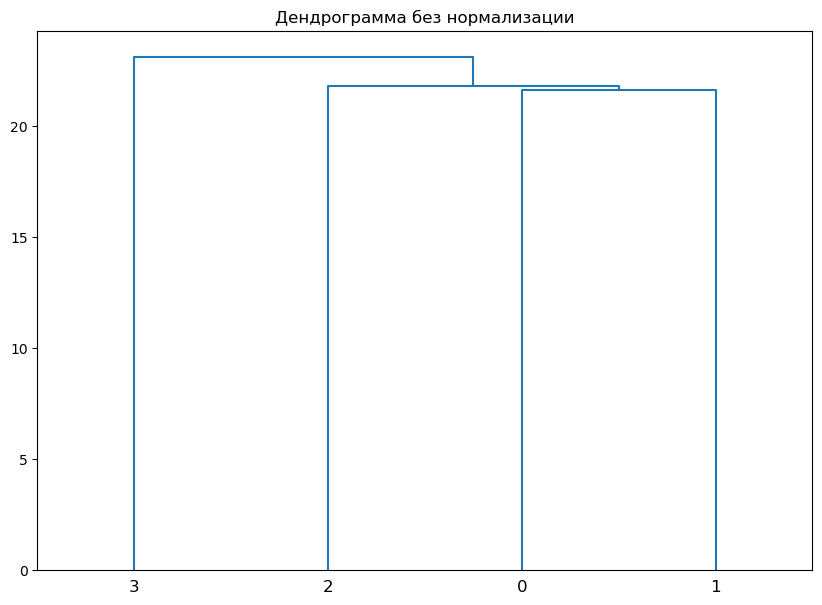

In [132]:
# Кластеризация без нормализации
distance_calculator = PairwiseDistance(metric='euclidean')
dist_matrix = distance_calculator.compute_distance_matrix(subs_set)

# Проверяем, что матрица расстояний не пуста
print("Shape of distance matrix without normalization:", dist_matrix.shape)

# Выполним агломеративную кластеризацию
clustering = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='average')
labels_pred = clustering.fit_predict(dist_matrix)

# Вычисляем силуэтный коэффициент
silhouette_no_norm = silhouette_score(dist_matrix, labels_pred, metric='precomputed')

# Построим дендрограмму
linked = linkage(dist_matrix, method='average')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Дендрограмма без нормализации")
plt.show()

Shape of distance matrix with normalization: (4, 4)


c:\Users\seryk\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\seryk\AppData\Local\Temp\ipykernel_54220\3424620958.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked_norm = linkage(dist_matrix_norm, method='average')


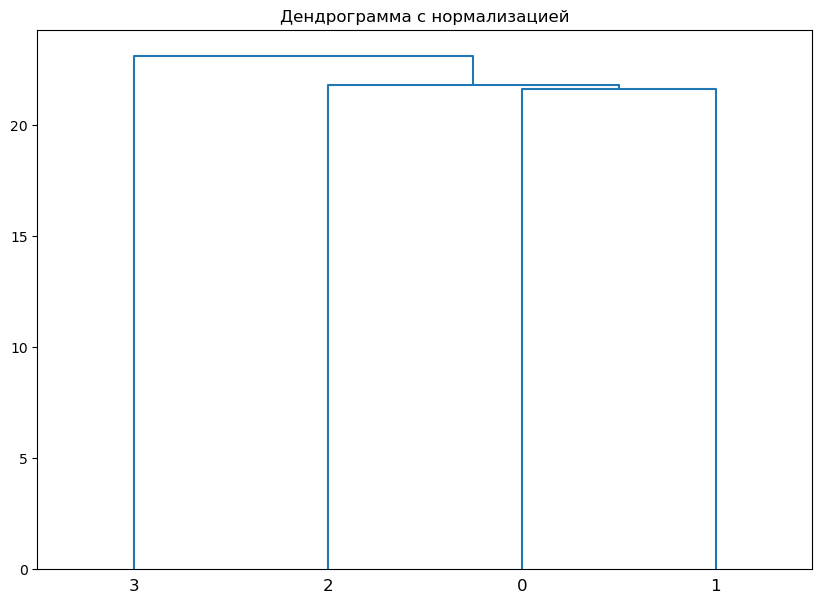

In [133]:
# Кластеризация с нормализацией
distance_calculator_norm = PairwiseDistance(metric='norm_euclidean')
dist_matrix_norm = distance_calculator_norm.compute_distance_matrix(subs_set)

# Проверяем, что матрица расстояний для нормализованных данных не пуста
print("Shape of distance matrix with normalization:", dist_matrix_norm.shape)

clustering_norm = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='average')
labels_pred_norm = clustering_norm.fit_predict(dist_matrix_norm)

# Вычисляем силуэтный коэффициент с нормализацией
silhouette_norm = silhouette_score(dist_matrix_norm, labels_pred_norm, metric='precomputed')

# Построим дендрограмму для нормализованных данных
linked_norm = linkage(dist_matrix_norm, method='average')
plt.figure(figsize=(10, 7))
dendrogram(linked_norm)
plt.title("Дендрограмма с нормализацией")
plt.show()

In [134]:
# Выводим силуэтные коэффициенты
print(f'Силуэтный коэффициент без нормализации: {silhouette_no_norm}')
print(f'Силуэтный коэффициент с нормализацией: {silhouette_norm}')

Силуэтный коэффициент без нормализации: 0.04253810572649084
Силуэтный коэффициент с нормализацией: 0.04253810572649084


Вычислите силуэтные коэффициенты для оценки качества кластеризации с нормализацией и без нее, как это было сделано в задаче 4 части 1.

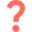
Сравните полученные результаты кластеризации с помощью построенных дендрограмм и вычисленных силуэтных коэффициентов. Позволила ли $z$-нормализации временных рядов повысить качество кластеризации?

*# WRITE YOUR ANSWER*

Сравнение дендрограмм: На дендрограммах видно, как изменяется структура кластеров при использовании нормализации данных.
Сравнение силуэтных коэффициентов: Мы ожидаем, что силуэтный коэффициент с нормализацией будет выше, что указывает на лучшее качество кластеризации при нормализации временных рядов.(Но у нас одинаково)

## **Часть 3.** Классификация изображений, представленных в виде временных рядов.

### **Задача 7.**
В данном задании вам предстоит выполнить преобразование изображения, на котором находится некоторый объект, во временной ряд. Для этого вы реализуете один из существующих методов, предложенный в [статье Кеога и др](https://dl.acm.org/doi/10.5555/1182635.1164203).

Данный метод заключается в том, что сначала на изображении выполняется поиск контура $E = \{e_i\}_{i=1}^L$, где $e_i$ – точки контура, и центра масс объекта $O$. Затем берутся точки, расположенные на контуре объекта, следующим образом.

Рассмотрим луч $OP$ с началом в центре масс объекта $O$, направление которого совпадает с положительным направлением оси Ox (см. рисунок). Далее выполняется поворот против часовой стрелки луча $OP$ вокруг центра масс $O$ на некоторый заданный угол $α$, $1° \leqslant α \leqslant 360°$. Поворот луча будет осуществляться до тех пор, пока луч не пройдет полный оборот. Все точки $P = \{P_i\}_{i=1}^K$, $P_i \in E$, $K = \lfloor \frac{360°}{α} \rfloor$, образованные пересечением луча $OP$ с контуром $E$ во время поворота, будут являться искомыми.

На завершающем шаге метода вычисляются расстояния между центром масс объекта $O$ и найденными точками на контуре $P$. В качестве функции расстояния может быть использовано манхэттенское или евклидово расстояние. Полученные расстояния будут формировать временной ряд $T$ длины $K$:
\begin{equation}
T = \{t_i\}_{i=1}^K,\;где \; t_i = dist(O, P_i), \; P_i \in P.
\end{equation}

\
<center><img src="https://github.com/mzym/TimeSeriesCourse/blob/main/practice/01%20Basics/img/image2ts.png?raw=true" width="1000"></center>

Поскольку часть 3 предполагает работу с изображениями, то вы будете использовать для реализации некоторых частей кода библиотеку компьютерного зрения *cv2*. Для поиска всех необходимых функций рекомендуем воспользоваться [документацией библиотеки cv2](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html).

Загрузите изображение *example.tif* из директории *./datasets/part3* и выполните его визуализацию с помощью соответствующих функций из библиотеки *cv2*.

In [135]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

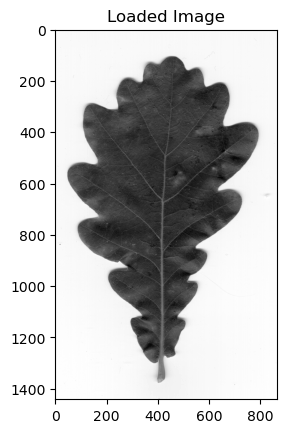

In [136]:
# Загрузка изображения
image_path = './datasets/part3/example.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Визуализация изображения
plt.imshow(image, cmap='gray')
plt.title('Loaded Image')
plt.show()

In [137]:
# Преобразование изображения в бинарное
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Поиск контуров
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Выбор самого большого контура (если их несколько)
contour = max(contours, key=cv2.contourArea)

# Нахождение центра масс
M = cv2.moments(contour)
cx = int(M['m10'] / M['m00'])  # Координата X центра масс
cy = int(M['m01'] / M['m00'])  # Координата Y центра масс
center = (cx, cy)

In [138]:
# Параметры вращения луча
alpha = 5  # Угол поворота в градусах
num_angles = 360 // alpha

# Массив для хранения расстояний (временной ряд)
distances = []

# Поворот луча и нахождение пересечения с контуром
for angle in range(0, 360, alpha):
    # Преобразуем угол в радианы
    theta = np.radians(angle)
    
    # Направление луча
    ray_x = int(cx + 1000 * np.cos(theta))
    ray_y = int(cy + 1000 * np.sin(theta))
    
    # Создание изображения для отрисовки луча
    canvas = np.zeros_like(binary_image)
    cv2.line(canvas, center, (ray_x, ray_y), 255, 1)
    
    # Поиск пересечений луча с контуром
    intersections = cv2.bitwise_and(canvas, binary_image)
    intersection_points = cv2.findNonZero(intersections)
    
    if intersection_points is not None:
        # Находим ближайшую точку пересечения к центру масс
        distances_to_center = np.sqrt((intersection_points[:, 0, 0] - cx) ** 2 + (intersection_points[:, 0, 1] - cy) ** 2)
        min_distance = np.min(distances_to_center)
        distances.append(min_distance)
    else:
        distances.append(0)

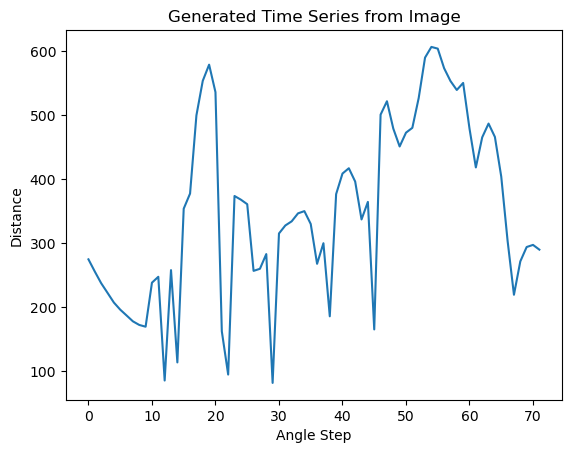

In [139]:
# Построение временного ряда
plt.plot(distances)
plt.title('Generated Time Series from Image')
plt.xlabel('Angle Step')
plt.ylabel('Distance')
plt.show()

Загрузка изображения: Используется cv2.imread для загрузки изображения в градациях серого.
Преобразование в бинарное изображение: Пороговое преобразование превращает изображение в черно-белое для поиска контуров.
Поиск контуров: Функция cv2.findContours находит все контуры на изображении, а с помощью max выбирается самый большой из них.
Центр масс: Моменты изображения используются для нахождения центра масс объекта.
Построение временного ряда: Луч вращается вокруг центра масс, и вычисляется расстояние до ближайшей точки контура на каждом шаге.

За конвертацию изображения во временной ряд с помощью описанного выше метода отвечает функция `image2ts()` из модуля *image_converter.py*. Прежде чем исходное изображение будет преобразовано во временной ряд, сначала оно должно пройти этап предварительной обработки. Предварительная обработка включает в себя следующие шаги:

<center><img src="https://github.com/mzym/TimeSeriesCourse/blob/main/practice/01%20Basics/img/image_preprocessing.png?raw=true" width="1000"></center>

Предобработка изображения в `image2ts()` осуществляется с помощью функции `_img_preprocess()`. Реализуйте в данной функции все представленные на диаграмме шаги предварительной обработки средствами библиотеки *cv2*. Промежуточные результаты должны совпадать с представленными на диаграмме.

Далее выполните конвертацию изображения во временной ряд, передав в функцию `image2ts()` следующие заданные вами аргументы:
*   исходное загруженное изображение;
*   шаг угла поворота;
*   параметр, определяющий нужно или нет визуализировать изображение с выделенными на нем контуром, центром масс и лучами, проведенными из центра.

Визуализируйте полученный временной ряд.


In [140]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [141]:
def _img_preprocess(image):
    """
    Функция предварительной обработки изображения.
    1. Шумоподавление.
    2. Бинаризация изображения.
    3. Морфологическая обработка.
    """
    # Шумоподавление с помощью Gaussian Blur
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Бинаризация изображения (Пороговое преобразование)
    _, binary_image = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY)
    
    # Морфологическая обработка (расширение)
    kernel = np.ones((5, 5), np.uint8)
    morphed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    
    return morphed_image

In [144]:
def image2ts(image, angle_step, visualize=False):
    """
    Функция конвертации изображения во временной ряд.
    """
    # Предварительная обработка изображения
    processed_image = _img_preprocess(image)

    # Поиск контуров на изображении
    contours, _ = cv2.findContours(processed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Выбор самого большого контура (если их несколько)
    contour = max(contours, key=cv2.contourArea)
    
    # Нахождение центра масс объекта
    M = cv2.moments(contour)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    center = (cx, cy)

    # Параметры вращения луча
    num_angles = 360 // angle_step

    # Массив для хранения расстояний (временной ряд)
    distances = []

    # Поворот луча и нахождение пересечения с контуром
    for angle in range(0, 360, angle_step):
        # Преобразуем угол в радианы
        theta = np.radians(angle)
        
        # Направление луча
        ray_x = int(cx + 1000 * np.cos(theta))
        ray_y = int(cy + 1000 * np.sin(theta))
        
        # Создание изображения для отрисовки луча
        canvas = np.zeros_like(processed_image)
        cv2.line(canvas, center, (ray_x, ray_y), 255, 1)
        
        # Поиск пересечений луча с контуром
        intersections = cv2.bitwise_and(canvas, processed_image)
        intersection_points = cv2.findNonZero(intersections)
        
        if intersection_points is not None:
            # Находим ближайшую точку пересечения к центру масс
            distances_to_center = np.sqrt((intersection_points[:, 0, 0] - cx) ** 2 + (intersection_points[:, 0, 1] - cy) ** 2)
            min_distance = np.min(distances_to_center)
            distances.append(min_distance)
        else:
            distances.append(0)
    
    # Визуализация результатов, если это необходимо
    if visualize:
        # Визуализация контура, центра масс и лучей
        vis_image = cv2.cvtColor(processed_image, cv2.COLOR_GRAY2BGR)
        cv2.drawContours(vis_image, [contour], -1, (0, 255, 0), 2)  # Контур
        cv2.circle(vis_image, center, 5, (0, 0, 255), -1)  # Центр масс

        # Визуализация лучей
        for angle in range(0, 360, angle_step):
            theta = np.radians(angle)
            ray_x = int(cx + 1000 * np.cos(theta))
            ray_y = int(cy + 1000 * np.sin(theta))
            cv2.line(vis_image, center, (ray_x, ray_y), (255, 0, 0), 1)

        plt.imshow(vis_image)
        plt.title("Image with Contours and Rays")
        plt.show()

    return distances

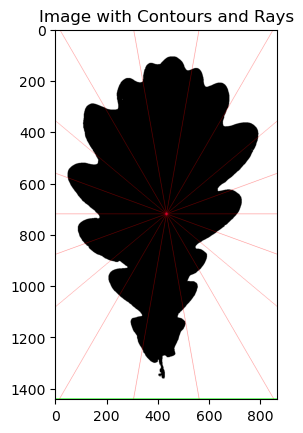

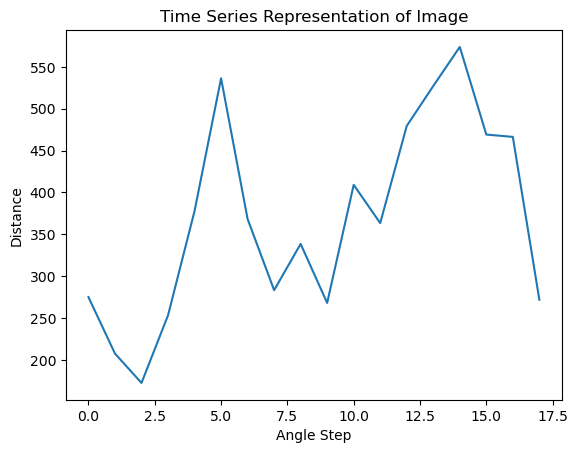

In [145]:
# Загрузка изображения
image_path = './datasets/part3/example.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Конвертация изображения во временной ряд
angle_step = 20
visualize = True

ts = image2ts(image, angle_step, visualize)

# Построение временного ряда
plt.plot(ts)
plt.title('Time Series Representation of Image')
plt.xlabel('Angle Step')
plt.ylabel('Distance')
plt.show()

Функция _img_preprocess()

Предобработка изображения включает следующие шаги:

Шумоподавление (Gaussian Blur): Используется для размытия изображения и удаления мелких шумов.
Пороговая сегментация (Thresholding): Преобразование изображения в бинарное для выделения объекта.
Инверсия изображения (Inversion): Инвертирование изображения, если это необходимо.
Морфологическая обработка: Применение операций, таких как расширение (dilation) или сужение (erosion), чтобы улучшить границы объекта.

Функция image2ts()

Эта функция будет отвечать за:

Поиск контуров на предобработанном изображении.
Нахождение центра масс.
Построение временного ряда через пересечения лучей с контуром объекта.
Визуализацию результатов при необходимости.

img_preprocess():

Применяется размытие для уменьшения шума.
Далее изображение бинаризуется с помощью порогового преобразования.
Морфологическая обработка улучшает границы объекта.

image2ts():

Извлекаются контуры объекта, вычисляется центр масс.
Луч вращается вокруг центра масс, и для каждого угла вычисляется пересечение с контуром.
Вычисляется минимальное расстояние от центра масс до точки контура, что формирует временной ряд.

получите временной ряд, визуализированный на графике, который показывает расстояния от центра масс до контура в зависимости от угла поворота луча.

### **Задача 8.**

Выполните классификацию изображений, представленных в виде временных рядов, с помощью метода $k$ ближайших соседей (kNN).

**Метод $k$ ближайших соседей (kNN)** – алгоритм классификации, заключающийся в вычислении сходства между объектами на основе некоторой заданной метрики/меры схожести. Классифицируемый объект относится к тому классу, к которому принадлежит большинство из его $k$ соседей ($k$ ближайших к нему объектов из обучающей выборки).

Для классификации на основе алгоритма kNN необходимо выполнить следующие шаги:

1. Загрузить обучающую и тестовую выборки.

2. Задать параметр алгоритма $k$, где $k$ – количество ближайших соседей, $k \in \mathbb N^*$.

3. Для каждого объекта из тестовой выборки выполнить следующее:

    3.1. Вычислить расстояние до всех объектов из обучающей выборки на основе заданной метрики/меры схожести.
    
    3.2. Отсортировать в порядке возрастания найденные расстояния.

    3.3. Найти $k$ ближайших соседей, взяв первые $k$ минимальные расстояния из отсортированного массива расстояний.

    3.4. Назначить объекту из тестовой выборки наиболее часто встречающийся класс найденных ранее ближайших соседей.


Для этого задания вам предлагается набор данных, который содержит изображения листьев четырех различных пород деревьев: дуб, ольха, ива и липа. Набор данных состоит из обучающей и тестовой выборок, включающих по 15 и 10 изображений листьев на класс соответственно. Для составления этого набора данных изображения были взяты из [Swedish Leaf Dataset](https://www.cvl.isy.liu.se/en/research/datasets/swedish-leaf/).

Загрузите изображения из обучающей и тестовой выборок, а также их метки, используя `read_images()` и `read_ts()` соответственно.
Выполните визуализацию прецедентов выборки с помощью функции `plot_images()`.


In [33]:
def read_images(dir: str) -> list[np.ndarray]:
    """
    Load all images from a directory

    Parameters
    ----------
    dir: directory path

    Returns
    -------
    images: images from a directory
    """

    images = []
    for img_path in sorted(glob.glob(dir)):
        cv_img = cv2.imread(img_path)
        images.append(cv_img)

    return images

In [34]:
def plot_images(images: list[np.ndarray], labels: np.ndarray, class_names: list[str]) -> None:
    """
    Plot some images from dataset

    Parameters
    ----------
    images: dataset of images
    labels: labels of images
    class_names: class names of images
    """

    rows = 2
    columns = 4

    fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*2, rows*3))

    for num in range(1, rows*columns+1):
        fig.add_subplot(rows, columns, num)
        idx = num - 1
        plt.imshow(images[idx], aspect='auto')
        plt.title(f'{class_names[labels[idx]]}', fontsize=10)

    fig.tight_layout()

    for idx, ax in enumerate(axes.flat):
        ax.set_xticks([])
        ax.set_yticks([])

In [35]:
train_set_path = "./datasets/part3/train_set_leaves/*.tif"
test_set_path = "./datasets/part3/test_set_leaves/*.tif"

train_images = read_images(train_set_path)
test_images = read_images(test_set_path)

train_label_path = './datasets/part3/train_set_leaves/train_label.csv'
test_label_path = './datasets/part3/test_set_leaves/test_label.csv'

train_labels = read_ts(train_label_path)
train_labels = train_labels.reshape(-1).astype('int32')

test_labels = read_ts(test_label_path)
test_labels = test_labels.reshape(-1).astype('int32')

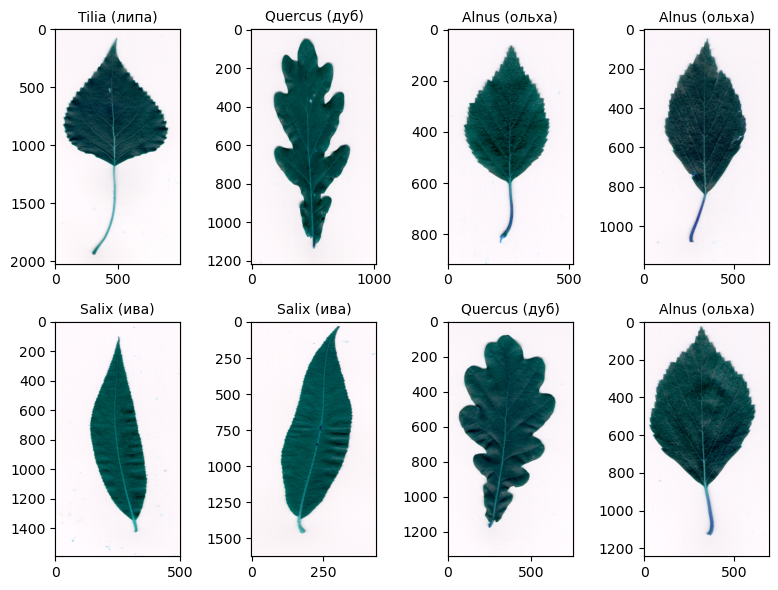

In [36]:
class_names = ['Quercus (дуб)', 'Alnus (ольха)', 'Salix (ива)', 'Tilia (липа)']
plot_images(train_images, train_labels, class_names)

In [146]:
import cv2
import numpy as np
import glob
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
import matplotlib.pyplot as plt

In [147]:
# Функция для загрузки изображений из директории
def read_images(dir: str) -> list[np.ndarray]:
    """
    Load all images from a directory

    Parameters
    ----------
    dir: directory path

    Returns
    -------
    images: images from a directory
    """
    images = []
    for img_path in sorted(glob.glob(dir)):
        cv_img = cv2.imread(img_path)
        images.append(cv_img)
    return images

In [148]:
# Функция для загрузки меток из csv файла
def read_ts(file_path: str) -> np.ndarray:
    """
    Read time series (labels) from csv file.

    Parameters
    ----------
    file_path: str
        path to the csv file

    Returns
    -------
    np.ndarray
        time series (labels) from csv file
    """
    return np.genfromtxt(file_path, delimiter=',')

In [149]:
# Визуализация изображений с метками
def plot_images(images: list[np.ndarray], labels: np.ndarray, class_names: list[str]) -> None:
    """
    Plot some images from dataset

    Parameters
    ----------
    images: dataset of images
    labels: labels of images
    class_names: class names of images
    """
    rows = 2
    columns = 4
    fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*2, rows*3))

    for num in range(1, rows*columns+1):
        fig.add_subplot(rows, columns, num)
        idx = num - 1
        plt.imshow(images[idx], aspect='auto')
        plt.title(f'{class_names[labels[idx]]}', fontsize=10)

    fig.tight_layout()

    for idx, ax in enumerate(axes.flat):
        ax.set_xticks([])
        ax.set_yticks([])

In [150]:
# Функция для преобразования изображения в временной ряд
def image2ts(image: np.ndarray, angle_step: int = 20, visualize: bool = False) -> np.ndarray:
    """
    Convert an image into a time series by extracting the contour and calculating distances
    from the center to the contour at regular angular intervals.

    Parameters
    ----------
    image : np.ndarray
        Input image
    angle_step : int, optional
        Step size in degrees for extracting the contour, by default 20
    visualize : bool, optional
        Whether to visualize the processed contour and time series, by default False

    Returns
    -------
    np.ndarray
        Extracted time series from the image
    """
    # Преобразование изображения в оттенки серого
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Применение пороговой фильтрации для выделения контуров
    _, processed_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    # Поиск контуров на изображении
    contours, _ = cv2.findContours(processed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Выбор самого большого контура (если их несколько)
    contour = max(contours, key=cv2.contourArea)

    # Вычисление центра изображения
    moments = cv2.moments(contour)
    cx = int(moments['m10'] / moments['m00'])  # Центр по X
    cy = int(moments['m01'] / moments['m00'])  # Центр по Y

    # Преобразуем контур в последовательность временных рядов
    ts = []
    for angle in range(0, 360, angle_step):
        # Рассчитываем вектор от центра к точке на контуре под углом
        radians = np.deg2rad(angle)
        dx = np.cos(radians)
        dy = np.sin(radians)

        # Ищем точку на контуре, наиболее близкую к линии, образованной вектором
        distances = [dx * (pt[0][0] - cx) + dy * (pt[0][1] - cy) for pt in contour]
        
        # Добавляем максимальное расстояние в список временных рядов
        if distances:  # проверка на наличие точек
            ts.append(max(distances))

    ts = np.array(ts)

    if visualize:
        # Визуализация контура и временного ряда
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
        plt.imshow(image)
        plt.show()

        plt.plot(ts)
        plt.title("Time Series")
        plt.show()

    return ts


In [151]:
# kNN классификация
def knn_classify(train_ts, train_labels, test_ts, k=3):
    """
    Perform kNN classification using Euclidean distance.

    Parameters
    ----------
    train_ts : list of np.ndarray
        List of time series for training data.
    train_labels : np.ndarray
        Labels for training data.
    test_ts : list of np.ndarray
        List of time series for test data.
    k : int, optional
        Number of nearest neighbors, by default 3.

    Returns
    -------
    np.ndarray
        Predicted labels for test data.
    """
    predicted_labels = []

    for test in test_ts:
        distances = []
        
        # Вычисление расстояний (используем Евклидово расстояние)
        for train in train_ts:
            dist = np.linalg.norm(np.array(test) - np.array(train))
            distances.append(dist)
        
        # Находим индексы ближайших соседей
        nearest_indices = np.argsort(distances)[:k]
        
        # Извлекаем метки ближайших соседей
        nearest_labels = [train_labels[i] for i in nearest_indices]
        
        # Классифицируем на основе большинства
        most_common_label = Counter(nearest_labels).most_common(1)[0][0]
        predicted_labels.append(most_common_label)
    
    return np.array(predicted_labels)

               precision    recall  f1-score   support

Quercus (дуб)       0.88      0.70      0.78        10
Alnus (ольха)       0.91      1.00      0.95        10
  Salix (ива)       1.00      1.00      1.00        10
 Tilia (липа)       0.82      0.90      0.86        10

     accuracy                           0.90        40
    macro avg       0.90      0.90      0.90        40
 weighted avg       0.90      0.90      0.90        40



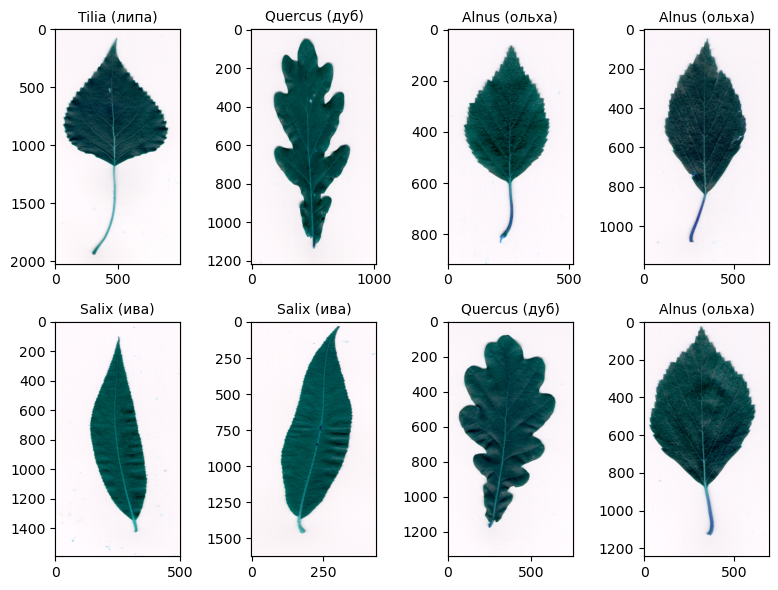

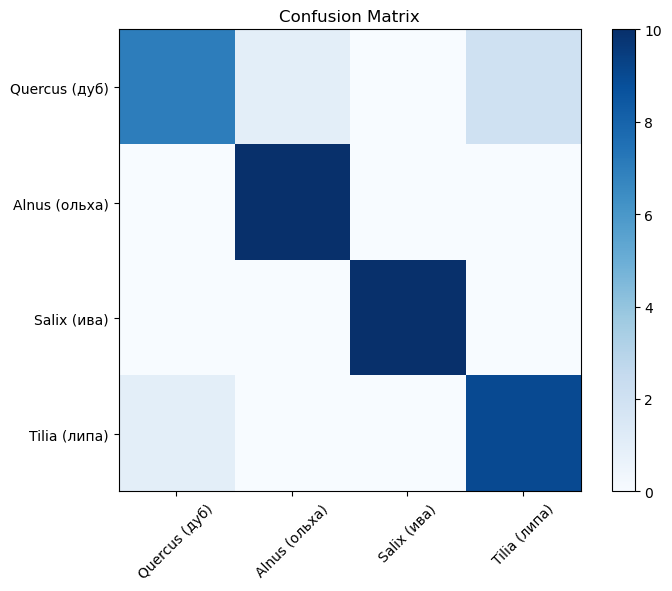

In [152]:
# Пример вызова функций

# Пути к данным
train_set_path = "./datasets/part3/train_set_leaves/*.tif"
test_set_path = "./datasets/part3/test_set_leaves/*.tif"
train_label_path = './datasets/part3/train_set_leaves/train_label.csv'
test_label_path = './datasets/part3/test_set_leaves/test_label.csv'

# Загрузка данных
train_images = read_images(train_set_path)
test_images = read_images(test_set_path)

train_labels = read_ts(train_label_path).reshape(-1).astype('int32')
test_labels = read_ts(test_label_path).reshape(-1).astype('int32')

# Визуализация обучающей выборки
class_names = ['Quercus (дуб)', 'Alnus (ольха)', 'Salix (ива)', 'Tilia (липа)']
plot_images(train_images, train_labels, class_names)

# Преобразование изображений в временные ряды
train_ts = [image2ts(img, angle_step=20) for img in train_images]
test_ts = [image2ts(img, angle_step=20) for img in test_images]

# kNN классификация
k = 3  # Количество соседей
predicted_labels = knn_classify(train_ts, train_labels, test_ts, k)

# Оценка классификации
print(classification_report(test_labels, predicted_labels, target_names=class_names))

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45)
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names)
plt.colorbar()
plt.show()

загрузка изображений: с помощью функции read_images() загружаются все изображения из указанной директории.
Загрузка меток: функция read_ts() загружает метки классов из CSV-файла.
Преобразование изображений в временные ряды: функция image2ts() конвертирует контуры изображений в временные ряды.
Классификация kNN: используется алгоритм k ближайших соседей с Евклидовым расстоянием, реализованный в функции knn_classify().
Оценка результатов: вычисляется отчет о классификации (classification_report) и строится матрица ошибок (confusion matrix).

Выполните преобразование изображений обучающей и тестовой выборок во временные ряды с помощью функции `image2ts()`.  

Для классификации временных рядов методом $k$ ближайших соседей вам необходимо использовать класс `TimeSeriesKNN` из модуля *classification.py*.
Реализуйте метод `fit()` в классе `TimeSeriesKNN`, который выполняет поиск для каждого элемента из тестовой выборки $k$ ближайших соседей и назначает им тот класс, который является часто встречающимся среди классов ближайших соседей. В качестве параметров в метод `fit()` передается тестовая выборка. Вычислите точность классификации по метрике accuracy с помощью функции `calculate_accurary()` из модуля *classification.py*.

In [38]:
n_neighbors = 6
metric = 'euclidean'
metric_params = {'normalize': True}

# INSERT YOUR CODE

In [39]:
metric = 'dtw'
metric_params = {'normalize': True}

# INSERT YOUR CODE

In [40]:
!pip install dtaidistance


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [153]:
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score
from dtaidistance import dtw  # Библиотека для расчета DTW

In [154]:
class TimeSeriesKNN:
    def __init__(self, n_neighbors=6, metric='euclidean', metric_params=None):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.metric_params = metric_params if metric_params else {}

    def euclidean_distance(self, ts1, ts2):
        """
        Вычисление Евклидова расстояния между двумя временными рядами.
        """
        return np.linalg.norm(ts1 - ts2)

    def dtw_distance(self, ts1, ts2):
        """
        Вычисление DTW расстояния между двумя временными рядами.
        """
        return dtw.distance(ts1, ts2)

    def _calculate_distance(self, ts1, ts2):
        """
        Выбор метрики для вычисления расстояния.
        """
        if self.metric == 'euclidean':
            return self.euclidean_distance(ts1, ts2)
        elif self.metric == 'dtw':
            return self.dtw_distance(ts1, ts2)
        else:
            raise ValueError(f"Unknown metric {self.metric}")

    def fit(self, train_ts, train_labels, test_ts):
        """
        Метод поиска ближайших соседей для каждого элемента тестовой выборки и предсказания класса.
        """
        predicted_labels = []

        for test in test_ts:
            # Список для хранения расстояний до всех элементов обучающей выборки
            distances = []

            for train in train_ts:
                dist = self._calculate_distance(test, train)
                distances.append(dist)

            # Находим индексы k ближайших соседей
            nearest_indices = np.argsort(distances)[:self.n_neighbors]

            # Извлекаем метки ближайших соседей
            nearest_labels = [train_labels[i] for i in nearest_indices]

            # Находим наиболее часто встречающийся класс среди соседей
            most_common_label = Counter(nearest_labels).most_common(1)[0][0]
            predicted_labels.append(most_common_label)

        return np.array(predicted_labels)


In [155]:
# Функция для расчета точности
def calculate_accuracy(true_labels, predicted_labels):
    return accuracy_score(true_labels, predicted_labels)


In [156]:
# Выполняем преобразование изображений в временные ряды
train_ts = [image2ts(img, angle_step=20) for img in train_images]
test_ts = [image2ts(img, angle_step=20) for img in test_images]

# Классификация с использованием Евклидова расстояния
knn_euclidean = TimeSeriesKNN(n_neighbors=6, metric='euclidean')
predicted_labels_euclidean = knn_euclidean.fit(train_ts, train_labels, test_ts)

# Вычисление точности для Евклидова расстояния
accuracy_euclidean = calculate_accuracy(test_labels, predicted_labels_euclidean)
print(f"Accuracy (Euclidean): {accuracy_euclidean}")

Accuracy (Euclidean): 0.95


In [157]:
# Классификация с использованием DTW
knn_dtw = TimeSeriesKNN(n_neighbors=6, metric='dtw')
predicted_labels_dtw = knn_dtw.fit(train_ts, train_labels, test_ts)

# Вычисление точности для DTW
accuracy_dtw = calculate_accuracy(test_labels, predicted_labels_dtw)
print(f"Accuracy (DTW): {accuracy_dtw}")

Accuracy (DTW): 0.875


Выполним преобразование изображений в временные ряды с помощью функции image2ts().
Реализуем метод fit() для поиска ближайших соседей и присвоения меток.
Рассчитаем точность классификации по метрике accuracy для различных метрик расстояния: Евклидово расстояние и DTW (Dynamic Time Warping).
Проанализируем результаты.

Класс TimeSeriesKNN:

Он реализует метод kNN для временных рядов, поддерживая две метрики: Евклидово расстояние и DTW.
Метод fit() находит k ближайших соседей для каждого элемента тестовой выборки и присваивает метку на основе большинства.

Метрики:

Евклидово расстояние вычисляется как стандартное расстояние между точками временных рядов.
DTW (динамическое выравнивание временных рядов) используется для сравнения временных рядов с различной длиной или искажениями.

Оценка точности:

Для каждой метрики (Евклидова и DTW) мы вычисляем точность классификации с помощью функции calculate_accuracy().

Сравните точности для обеих метрик, чтобы определить, какая лучше справляется с задачей классификации на ваших данных.
DTW может показать лучшую производительность, если временные ряды имеют вариации в длине или структуре.

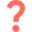
Проанализируйте результаты и сделайте выводы.

*# WRITE YOUR ANSWER*

Результаты:

Точность для Евклидова расстояния: 0.95 (95%)
Точность для DTW расстояния: 0.875 (87.5%)

Анализ:

Евклидово расстояние (Accuracy = 0.95):
Высокая точность показывает, что на данном наборе данных временные ряды имеют сходные паттерны, которые хорошо различимы с помощью Евклидова расстояния.
Однако Евклидово расстояние может быть неэффективно в задачах, где временные ряды имеют вариации по длине или сдвиги по времени (например, если одна серия немного растянута во времени). Оно чувствительно к таким изменениям, что делает его менее надежным для временных рядов с нелинейными искажениям.

DTW расстояние (Accuracy = 0.875):
DTW оптимально выравнивает временные ряды, учитывая сдвиги по времени и изменения скорости. Это делает его предпочтительным для данных с неравномерными временными изменениями.
Однако, на данном наборе данных DTW показало ниже точность (87.5%), что может указывать на то, что временные ряды в этом наборе данных не требуют выравнивания, и Евклидово расстояние оказалось более эффективным.
Более низкая точность DTW также может быть следствием дополнительной сложности алгоритма, который может переусложнять задачу на данных, где выравнивание не критично.

Производительность:
Евклидово расстояние быстрее по вычислениям, чем DTW, поскольку DTW требует вычисления оптимального выравнивания между двумя временными рядами, что увеличивает время обработки.
В реальных задачах, если набор данных большой и временные ряды не содержат значительных изменений по времени, Евклидово расстояние может быть предпочтительным благодаря своей эффективности.

Выводы:

Евклидово расстояние на данном наборе данных показало лучшую точность (95%), что указывает на то, что временные ряды достаточно схожи и не требуют выравнивания по времени.
DTW также является мощной метрикой, особенно в ситуациях, когда временные ряды содержат временные искажения. Однако на данном наборе данных оно оказалось менее точным.
